<a href="https://colab.research.google.com/github/iris-kurapaty/Batch-Normalization/blob/main/Batch_Normalization_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
pwd

'/content'

In [16]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms, utils
from torchsummary import summary
from tqdm import tqdm
from model import *
from utils import *
%matplotlib inline
import matplotlib.pyplot as plt

In [19]:
import numpy as np

In [12]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      # transforms.Resize((28, 28)),
                                      # transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values.
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])


# Dataset and Creating Train/Test Split

In [13]:
train_data = datasets.CIFAR10('./data', train=True, download=True, transform=train_transforms)
test_data = datasets.CIFAR10('./data', train=False, download=True, transform=test_transforms)

Files already downloaded and verified
Files already downloaded and verified


# Dataloader Arguments & Test/Train Dataloaders


In [14]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train_data, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test_data, **dataloader_args)

CUDA Available? True


torch.Size([128, 3, 32, 32])
torch.Size([128])


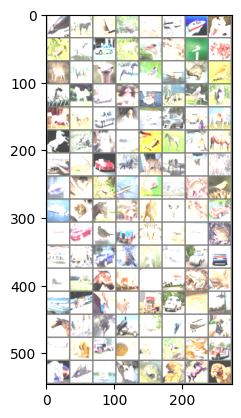

plane horse bird  deer  plane plane ship  horse frog  horse car   deer  bird  bird  bird  truck deer  horse bird  horse bird  ship  frog  bird  bird  horse truck dog   ship  deer  horse dog   horse deer  car   dog   ship  car   truck horse horse deer  cat   plane frog  horse bird  horse plane deer  car   horse cat   plane cat   deer  ship  cat   frog  plane frog  deer  frog  bird  ship  cat   horse deer  deer  cat   dog   car   ship  car   bird  truck cat   bird  deer  frog  ship  frog  car   bird  bird  deer  car   car   plane dog   horse horse cat   car   frog  cat   ship  frog  bird  dog   truck car   frog  plane horse horse dog   truck cat   plane plane dog   plane dog   truck cat   cat   bird  cat   truck horse plane ship  cat   frog  dog   horse dog  


In [22]:
# We'd need to convert it into Numpy! Remember above we have converted it into tensors already
# train_set = train_data.train_data
# train_set = train_data.transform(train_data.numpy())

# print('[Train]')
# print(' - Numpy Shape:', train_data.train_data.cpu().numpy().shape)
# print(' - Tensor Shape:', train_data.train_data.size())
# print(' - min:', torch.min(train_set))
# print(' - max:', torch.max(train_set))
# print(' - mean:', torch.mean(train_set))
# print(' - std:', torch.std(train_set))
# print(' - var:', torch.var(train_set))
batch_size = 128
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

# Let's visualize some of the images
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

imshow(utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


# The model

In [ ]:
from model import Net7

# Model Params

In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model_summary(Net7, device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
       BatchNorm2d-2            [-1, 8, 26, 26]              16
           Dropout-3            [-1, 8, 26, 26]               0
              ReLU-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           1,152
       BatchNorm2d-6           [-1, 16, 24, 24]              32
           Dropout-7           [-1, 16, 24, 24]               0
              ReLU-8           [-1, 16, 24, 24]               0
            Conv2d-9            [-1, 8, 24, 24]             128
             ReLU-10            [-1, 8, 24, 24]               0
        MaxPool2d-11            [-1, 8, 12, 12]               0
           Conv2d-12            [-1, 8, 10, 10]             576
      BatchNorm2d-13            [-1, 8, 10, 10]              16
          Dropout-14            [-1, 8,

# Training and Testing


In [ ]:
train_losses_t = []
test_losses_t = []
train_acc_t = []
test_acc_t = []

# Let's Train and test our model

In [ ]:
model =  Net7().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_losses, train_acc = train(model, device, train_loader, optimizer, epoch)
    train_losses_t += train_losses
    train_acc_t.append(train_acc)
    test_losses, test_acc = test(model, device, test_loader)
    test_losses_t += test_losses
    test_acc_t.append(test_acc)

EPOCH: 0


Loss=0.15766121447086334 Batch_id=468 Accuracy=73.78: 100%|██████████| 469/469 [00:27<00:00, 16.96it/s]



Test set: Average loss: 0.1785, Accuracy: 9556/10000 (95.56%)

EPOCH: 1


Loss=0.075292207300663 Batch_id=468 Accuracy=96.49: 100%|██████████| 469/469 [00:23<00:00, 19.70it/s]



Test set: Average loss: 0.0744, Accuracy: 9808/10000 (98.08%)

EPOCH: 2


Loss=0.07555484771728516 Batch_id=468 Accuracy=97.36: 100%|██████████| 469/469 [00:23<00:00, 19.63it/s]



Test set: Average loss: 0.0454, Accuracy: 9885/10000 (98.85%)

EPOCH: 3


Loss=0.050831396132707596 Batch_id=468 Accuracy=97.65: 100%|██████████| 469/469 [00:23<00:00, 19.58it/s]



Test set: Average loss: 0.0412, Accuracy: 9883/10000 (98.83%)

EPOCH: 4


Loss=0.08570486307144165 Batch_id=468 Accuracy=97.96: 100%|██████████| 469/469 [00:23<00:00, 19.73it/s]



Test set: Average loss: 0.0380, Accuracy: 9888/10000 (98.88%)

EPOCH: 5


Loss=0.0849430039525032 Batch_id=468 Accuracy=97.95: 100%|██████████| 469/469 [00:24<00:00, 19.53it/s]



Test set: Average loss: 0.0357, Accuracy: 9898/10000 (98.98%)

EPOCH: 6


Loss=0.040291402488946915 Batch_id=468 Accuracy=98.13: 100%|██████████| 469/469 [00:23<00:00, 19.74it/s]



Test set: Average loss: 0.0319, Accuracy: 9905/10000 (99.05%)

EPOCH: 7


Loss=0.03722399100661278 Batch_id=468 Accuracy=98.23: 100%|██████████| 469/469 [00:23<00:00, 19.62it/s]



Test set: Average loss: 0.0309, Accuracy: 9913/10000 (99.13%)

EPOCH: 8


Loss=0.09240969270467758 Batch_id=468 Accuracy=98.33: 100%|██████████| 469/469 [00:23<00:00, 19.71it/s]



Test set: Average loss: 0.0284, Accuracy: 9916/10000 (99.16%)

EPOCH: 9


Loss=0.04927772656083107 Batch_id=468 Accuracy=98.41: 100%|██████████| 469/469 [00:23<00:00, 19.70it/s]



Test set: Average loss: 0.0292, Accuracy: 9909/10000 (99.09%)

EPOCH: 10


Loss=0.017271295189857483 Batch_id=468 Accuracy=98.42: 100%|██████████| 469/469 [00:23<00:00, 19.65it/s]



Test set: Average loss: 0.0269, Accuracy: 9924/10000 (99.24%)

EPOCH: 11


Loss=0.08498888462781906 Batch_id=468 Accuracy=98.40: 100%|██████████| 469/469 [00:24<00:00, 19.54it/s]



Test set: Average loss: 0.0289, Accuracy: 9915/10000 (99.15%)

EPOCH: 12


Loss=0.02194487489759922 Batch_id=468 Accuracy=98.49: 100%|██████████| 469/469 [00:24<00:00, 19.44it/s]



Test set: Average loss: 0.0251, Accuracy: 9923/10000 (99.23%)

EPOCH: 13


Loss=0.041380200535058975 Batch_id=468 Accuracy=98.53: 100%|██████████| 469/469 [00:24<00:00, 19.53it/s]



Test set: Average loss: 0.0238, Accuracy: 9925/10000 (99.25%)

EPOCH: 14


Loss=0.026339197531342506 Batch_id=468 Accuracy=98.63: 100%|██████████| 469/469 [00:23<00:00, 19.54it/s]



Test set: Average loss: 0.0309, Accuracy: 9910/10000 (99.10%)



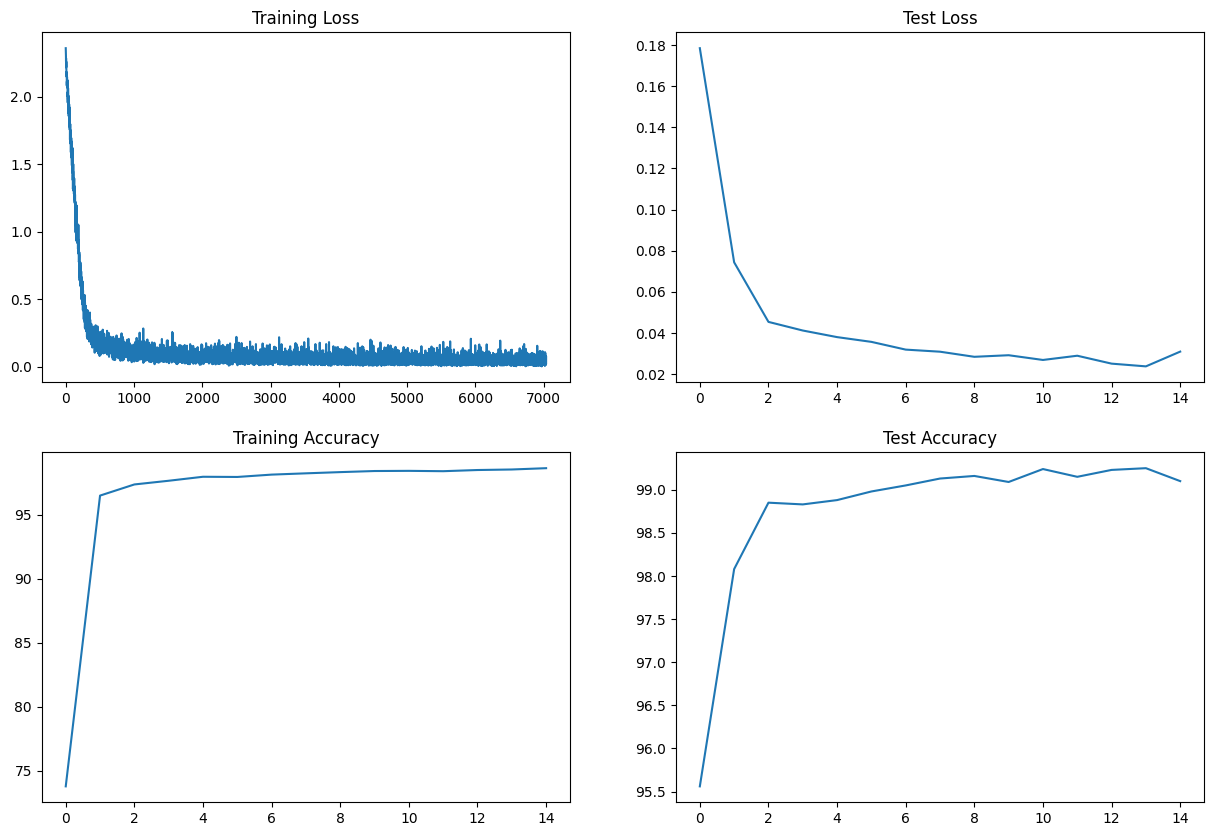

In [ ]:
plot_loss_acc(train_losses_t, train_acc_t, test_losses_t, test_acc_t)